In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [21]:
df=pd.read_csv('C:\\Users\\Rachana\\Downloads\\pokemon.csv',encoding='latin1',index_col=0)

In [22]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


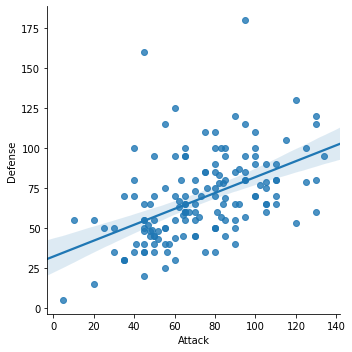

In [23]:
sns.lmplot(x='Attack',y='Defense',data=df)

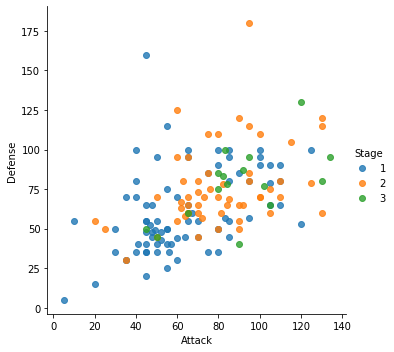

In [25]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')

(0, 190.44212186867063)

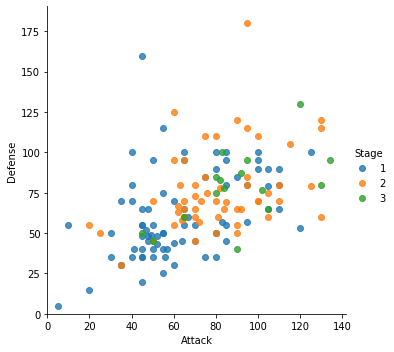

In [27]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')
plt.xlim(0,None)
plt.ylim(0,None)

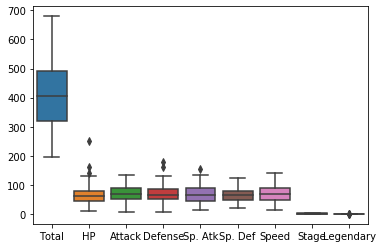

In [28]:
#role of pandas
#1.Boxplot
sns.boxplot(data=df)

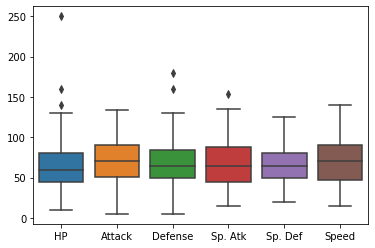

In [29]:
#we are dropping total,stage and lengendary
new_df=df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=new_df)

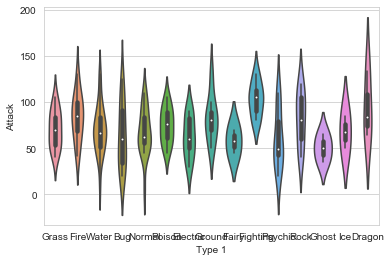

In [30]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df)

In [31]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

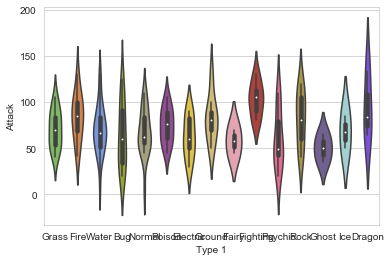

In [32]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

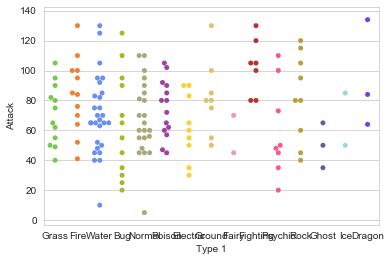

In [33]:
#swarmplot
sns.swarmplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by type')

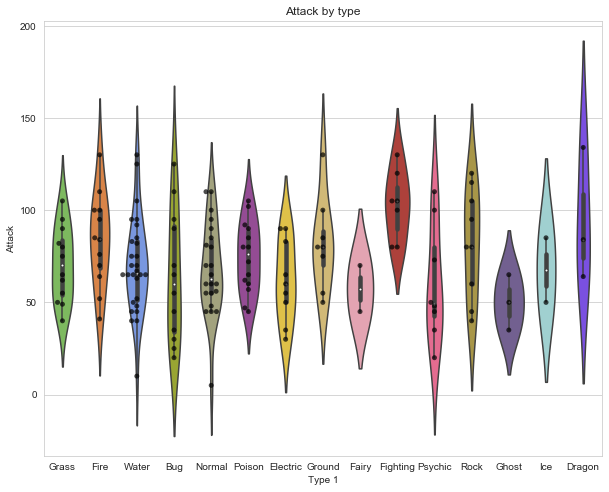

In [37]:
#overlaying the plots
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)
sns.swarmplot(x='Type 1',y='Attack',data=df,color='k',alpha=0.7)
plt.title('Attack by type')

In [38]:
new_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [39]:
melted_df=pd.melt(new_df,id_vars=['Name','Type 1','Type 2'],var_name='Stats')
melted_df.head()

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [40]:
print(new_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


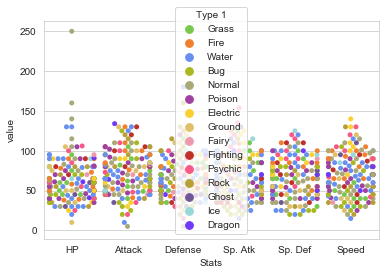

In [42]:
sns.swarmplot(x='Stats',y='value',data=melted_df,palette=pkmn_type_colors,hue='Type 1')

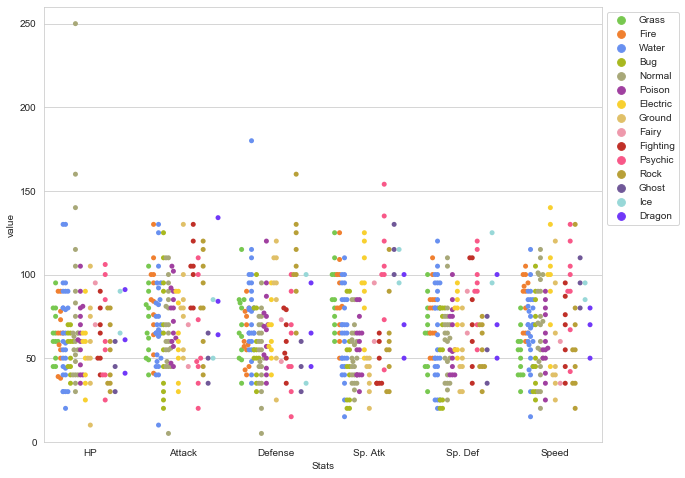

In [51]:
#enlarge the plot
plt.figure(figsize=(10,8))
#split points by hue
sns.swarmplot(x='Stats',y='value',data=melted_df,palette=pkmn_type_colors,hue='Type 1',dodge=True)
#Adjust yaxis and place legend
plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1,1),loc=2)

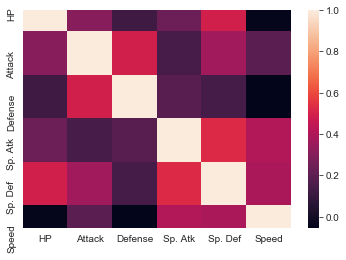

In [52]:
#heatmap
corr=new_df.corr()
sns.heatmap(corr)

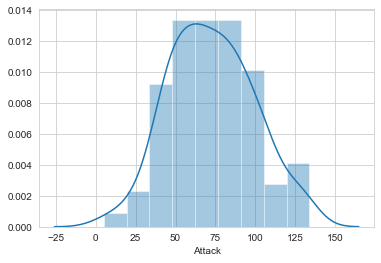

In [53]:
#histogram
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

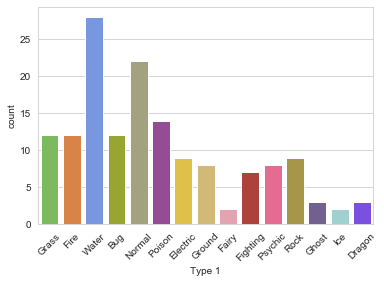

In [55]:
#Bar plot
sns.countplot(x="Type 1", data=df,palette=pkmn_type_colors)
plt.xticks(rotation=45)

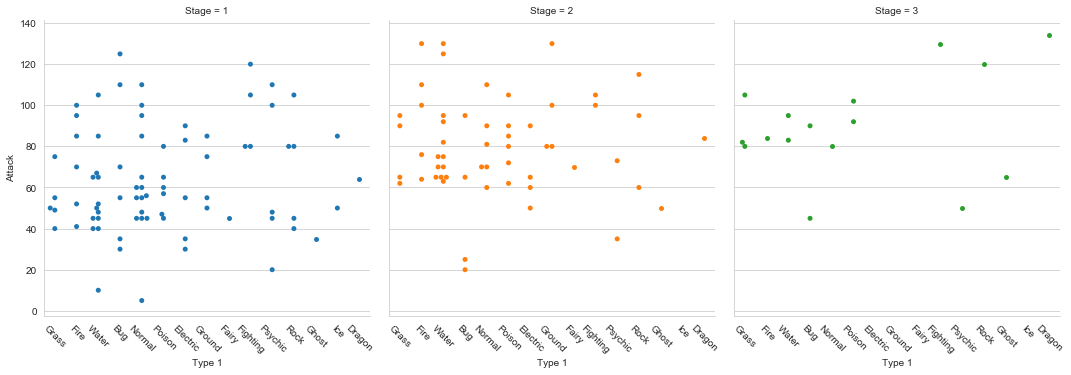

In [61]:
#factor plot/catplot
g=sns.catplot(x='Type 1',y='Attack',data=df,kind='swarm',hue='Stage',col='Stage')
g.set_xticklabels(rotation=-45)

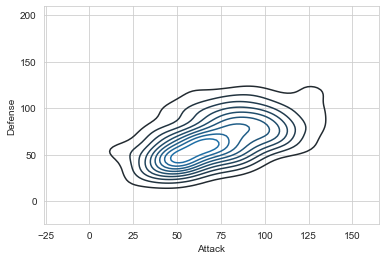

In [62]:
#Density plot
sns.kdeplot(df.Attack,df.Defense)

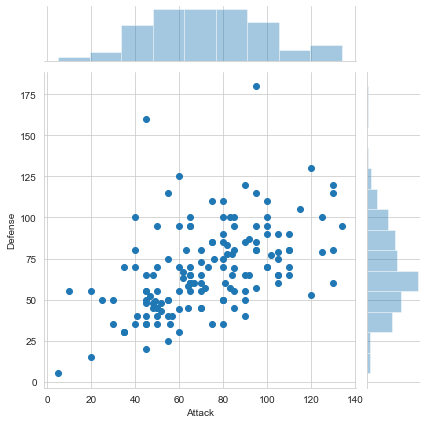

In [63]:
#Joint Distribution plot
sns.jointplot(x='Attack',y='Defense',data=df)